Automating Data Pull

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15', 
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '5cdefd09-feb4-42dc-ac75-683a30b46d2b',
}
session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  # print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [3]:
type(data)

dict

In [5]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [7]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11799,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.978237e+07,1.978237e+07,False,NaN,1,NaN,NaN,None,2024-11-15T07:27:00.000Z,88299.628291,8.592323e+10,-26.4167,0.271675,-1.467925,16.272631,32.026606,50.052510,49.275858,1.746776e+12,59.7679,1.854292e+12,None,2024-11-15T07:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-15 14:28:54.688637
1,1027,Ethereum,ETH,ethereum,9551,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204206e+08,1.204206e+08,True,NaN,2,NaN,NaN,None,2024-11-15T07:27:00.000Z,3068.880897,3.476651e+10,-25.5403,0.057968,-3.599417,5.528891,17.871834,33.599264,18.181430,3.695565e+11,12.6448,3.695565e+11,None,2024-11-15T07:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-15 14:28:54.688637
2,825,Tether USDt,USDT,tether,103532,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.272845e+11,1.298354e+11,True,NaN,3,NaN,NaN,None,2024-11-15T07:27:00.000Z,1.000419,1.800406e+11,-25.7075,0.007502,-0.014285,-0.032025,0.055784,0.057408,0.020910,1.273378e+11,4.3580,1.298898e+11,None,2024-11-15T07:27:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-15 14:28:54.688637
3,5426,Solana,SOL,solana,787,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.719714e+08,5.883207e+08,True,NaN,4,NaN,NaN,None,2024-11-15T07:28:00.000Z,210.274269,7.513822e+09,-30.4891,0.109087,-2.735906,5.872791,37.147721,60.661012,51.346332,9.924344e+10,3.3963,1.237087e+11,None,2024-11-15T07:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-15 14:28:54.688637
4,1839,BNB,BNB,bnb,2281,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440989e+08,1.440989e+08,False,NaN,5,NaN,NaN,None,2024-11-15T07:28:00.000Z,618.852477,3.332510e+09,7.2066,-0.092910,-0.673794,3.290039,4.666283,12.878217,18.539813,8.917599e+10,3.0520,8.917599e+10,None,2024-11-15T07:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-15 14:28:54.688637
5,74,Dogecoin,DOGE,dogecoin,1100,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.467981e+11,1.467981e+11,True,NaN,6,NaN,NaN,None,2024-11-15T07:27:00.000Z,0.370140,1.590004e+10,-29.5216,-0.122931,-4.941328,85.042547,212.834203,262.370940,266.519346,5.433581e+10,1.8592,5.433581e+10,None,2024-11-15T07:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-15 14:28:54.688637
6,52,XRP,XRP,xrp,1424,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.693124e+10,9.998701e+10,False,NaN,7,NaN,NaN,None,2024-11-15T07:28:00.000Z,0.799979,1.125169e+10,76.8032,-1.906333,16.405459,45.652704,48.468552,40.097811,41.774596,4.554382e+10,1.5591,7.999793e+10,None,2024-11-15T07:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-15 14:28:54.688637
7,3408,USDC,USDC,usd-coin,23076,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.675214e+10,3.675214e+10,False,NaN,8,NaN,NaN,None,2024-11-15T07:27:00.000Z,1.000010,1.426519e+10,-23.4986,0.006098,0.007863,0.020709,0.015129,0.014477,0.009417,3.675252e+10,1.2578,3.675252e+10,None,2024-11-15T07:27:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-11-15 14:28:54.688637
8,2010,Cardano,ADA,cardano,1349,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+

In [16]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15', 
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '5cdefd09-feb4-42dc-ac75-683a30b46d2b',
    }
    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    # Automating Data Pull
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    # df = df.append(df2)
    df = pd.concat([df, df2], ignore_index=True)
    
    # if not os.csv.path.isfile(r'C:\Users\poj00\Python Tutorial\API.csv'):
    #     df.to_csv(r'C:\Users\poj00\Python Tutorial\API.csv', header = 'column_names')
    # else:
    #     df.to_csv(r'C:\Users\poj00\Python Tutorial\API.csv', mode = 'a', header = False)

In [18]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) # sleep for 1 minute
exit()

AttributeError: module 'os' has no attribute 'csv'

In [14]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11799,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.978237e+07,1.978237e+07,False,NaN,1,NaN,NaN,None,2024-11-15T07:27:00.000Z,88299.628291,8.592323e+10,-26.4167,0.271675,-1.467925,16.272631,32.026606,50.052510,49.275858,1.746776e+12,59.7679,1.854292e+12,None,2024-11-15T07:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-15 14:28:54.688637
1,1027,Ethereum,ETH,ethereum,9551,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204206e+08,1.204206e+08,True,NaN,2,NaN,NaN,None,2024-11-15T07:27:00.000Z,3068.880897,3.476651e+10,-25.5403,0.057968,-3.599417,5.528891,17.871834,33.599264,18.181430,3.695565e+11,12.6448,3.695565e+11,None,2024-11-15T07:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-15 14:28:54.688637
2,825,Tether USDt,USDT,tether,103532,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.272845e+11,1.298354e+11,True,NaN,3,NaN,NaN,None,2024-11-15T07:27:00.000Z,1.000419,1.800406e+11,-25.7075,0.007502,-0.014285,-0.032025,0.055784,0.057408,0.020910,1.273378e+11,4.3580,1.298898e+11,None,2024-11-15T07:27:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-15 14:28:54.688637
3,5426,Solana,SOL,solana,787,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.719714e+08,5.883207e+08,True,NaN,4,NaN,NaN,None,2024-11-15T07:28:00.000Z,210.274269,7.513822e+09,-30.4891,0.109087,-2.735906,5.872791,37.147721,60.661012,51.346332,9.924344e+10,3.3963,1.237087e+11,None,2024-11-15T07:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-15 14:28:54.688637
4,1839,BNB,BNB,bnb,2281,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440989e+08,1.440989e+08,False,NaN,5,NaN,NaN,None,2024-11-15T07:28:00.000Z,618.852477,3.332510e+09,7.2066,-0.092910,-0.673794,3.290039,4.666283,12.878217,18.539813,8.917599e+10,3.0520,8.917599e+10,None,2024-11-15T07:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-15 14:28:54.688637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,5994,Shiba Inu,SHIB,shiba-inu,903,2020-08-01T00:00:00.000Z,"[memes, ethereum-ecosystem, doggone-doggerel]",NaN,5.892605e+14,5.895125e+14,False,NaN,11,NaN,NaN,None,2024-11-15T07:30:00.000Z,0.000024,1.862479e+09,-45.3470,-0.106416,-7.105566,23.174045,32.263795,77.935831,79.228795,1.400559e+10,0.4795,1.401158e+10,None,2024-11-15T07:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,2024-11-15 14:32:11.982682
71,11419,Toncoin,TON,toncoin,610,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.545759e+09,5.115270e+09,True,NaN,12,3.414167e+09,1.804539e+10,None,2024-11-15T07:30:00.000Z,5.285446,4.483176e+08,-18.7761,0.004046,-1.608615,8.319817,1.785991,-5.139197,-18.856944,1.345547e+10,0.4606,2.703649e+10,None,2024-11-15T07:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-15 14:32:11.982682
72,5805,Avalanche,AVAX,avalanche,803,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",7.157487e+08,4.073505e+08,4.473536e+08,False,NaN,13,NaN,NaN,None,2024-11-15T07:30:00.000Z,31.905511,7.825844e+08,-42.8119,-0.207911,-3.783297,16.516234,16.523119,33.229021,55.231208,1.299673e+10,0.4449,2.283633e+10,None

Automating Pull into CSV

In [20]:
import os
import pandas as pd

def api_runner():
    # ... (your API call and data processing logic)
    # ...

    # Create the CSV file if it doesn't exist
    if not os.path.isfile(r'C:\Users\poj00\Python Tutorial\API.csv'):
        df.to_csv(r'C:\Users\poj00\Python Tutorial\API.csv', index=False)  # Save without index
    else:
        # Append to the existing CSV file (optional)
        df.to_csv(r'C:\Users\poj00\Python Tutorial\API.csv', mode='a', header=False, index=False)

In [22]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) # sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [24]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11799,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.978239e+07,1.978239e+07,False,NaN,1,NaN,NaN,None,2024-11-15T07:47:00.000Z,87912.365676,8.596385e+10,-26.3374,0.053268,-2.512905,15.387337,31.387048,49.123896,48.425679,1.739117e+12,59.7572,1.846160e+12,None,2024-11-15T07:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-15 14:48:39.879841
1,1027,Ethereum,ETH,ethereum,9552,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204206e+08,1.204206e+08,True,NaN,2,NaN,NaN,None,2024-11-15T07:47:00.000Z,3056.405627,3.465732e+10,-25.9610,0.026901,-4.638723,4.606087,17.355401,32.459374,17.604279,3.680542e+11,12.6466,3.680542e+11,None,2024-11-15T07:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-15 14:48:39.879841
2,825,Tether USDt,USDT,tether,103541,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.272845e+11,1.298354e+11,True,NaN,3,NaN,NaN,None,2024-11-15T07:48:00.000Z,1.000524,1.793079e+11,-26.1957,0.034253,0.030237,-0.056780,0.071958,0.073818,0.031605,1.273512e+11,4.3743,1.299034e+11,None,2024-11-15T07:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-15 14:48:39.879841
3,5426,Solana,SOL,solana,787,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.719711e+08,5.883204e+08,True,NaN,4,NaN,NaN,None,2024-11-15T07:48:00.000Z,210.135539,7.460366e+09,-30.9119,0.413172,-3.603800,5.209160,37.010417,60.270530,50.790793,9.917790e+10,3.4082,1.236270e+11,None,2024-11-15T07:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-15 14:48:39.879841
4,1839,BNB,BNB,bnb,2281,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440989e+08,1.440989e+08,False,NaN,5,NaN,NaN,None,2024-11-15T07:48:00.000Z,617.441308,3.159471e+09,-6.9480,-0.001438,-4.697182,2.769672,4.506759,12.246385,18.089636,8.897264e+10,3.0561,8.897264e+10,None,2024-11-15T07:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-15 14:48:39.879841
5,74,Dogecoin,DOGE,dogecoin,1100,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.467983e+11,1.467983e+11,True,NaN,6,NaN,NaN,None,2024-11-15T07:47:00.000Z,0.369194,1.588079e+10,-29.2934,0.543269,-6.085616,84.042995,210.659781,260.744453,264.888806,5.419699e+10,1.8622,5.419699e+10,None,2024-11-15T07:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-15 14:48:39.879841
6,52,XRP,XRP,xrp,1424,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.693124e+10,9.998701e+10,False,NaN,7,NaN,NaN,None,2024-11-15T07:48:00.000Z,0.796581,1.125915e+10,77.4291,0.492865,15.014744,44.507898,47.985444,39.257627,41.076269,4.535033e+10,1.5574,7.965807e+10,None,2024-11-15T07:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-15 14:48:39.879841
7,3408,USDC,USDC,usd-coin,23077,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.675190e+10,3.675190e+10,False,NaN,8,NaN,NaN,None,2024-11-15T07:48:00.000Z,1.000081,1.416923e+10,-24.1684,0.036677,0.033390,-0.003576,0.021193,0.007941,0.007999,3.675486e+10,1.2625,3.675486e+10,None,2024-11-15T07:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-11-15 14:48:39.879841
8,2010,Cardano,ADA,cardano,1349,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+1

In [26]:
df72 = pd.read_csv(r'C:\Users\poj00\Python Tutorial\API.csv')
df72

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11799,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.978239e+07,1.978239e+07,False,NaN,1,NaN,NaN,NaN,2024-11-15T07:47:00.000Z,87912.365676,8.596385e+10,-26.3374,0.053268,-2.512905,15.387337,31.387048,49.123896,48.425679,1.739117e+12,59.7572,1.846160e+12,NaN,2024-11-15T07:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-15 14:48:39.879841
1,1027,Ethereum,ETH,ethereum,9552,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.204206e+08,1.204206e+08,True,NaN,2,NaN,NaN,NaN,2024-11-15T07:47:00.000Z,3056.405627,3.465732e+10,-25.9610,0.026901,-4.638723,4.606087,17.355401,32.459374,17.604279,3.680542e+11,12.6466,3.680542e+11,NaN,2024-11-15T07:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-15 14:48:39.879841
2,825,Tether USDt,USDT,tether,103541,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.272845e+11,1.298354e+11,True,NaN,3,NaN,NaN,NaN,2024-11-15T07:48:00.000Z,1.000524,1.793079e+11,-26.1957,0.034253,0.030237,-0.056780,0.071958,0.073818,0.031605,1.273512e+11,4.3743,1.299034e+11,NaN,2024-11-15T07:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-15 14:48:39.879841
3,5426,Solana,SOL,solana,787,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.719711e+08,5.883204e+08,True,NaN,4,NaN,NaN,NaN,2024-11-15T07:48:00.000Z,210.135539,7.460366e+09,-30.9119,0.413172,-3.603800,5.209160,37.010417,60.270530,50.790793,9.917790e+10,3.4082,1.236270e+11,NaN,2024-11-15T07:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-15 14:48:39.879841
4,1839,BNB,BNB,bnb,2281,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.440989e+08,1.440989e+08,False,NaN,5,NaN,NaN,NaN,2024-11-15T07:48:00.000Z,617.441308,3.159471e+09,-6.9480,-0.001438,-4.697182,2.769672,4.506759,12.246385,18.089636,8.897264e+10,3.0561,8.897264e+10,NaN,2024-11-15T07:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-15 14:48:39.879841
5,74,Dogecoin,DOGE,dogecoin,1100,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.467983e+11,1.467983e+11,True,NaN,6,NaN,NaN,NaN,2024-11-15T07:47:00.000Z,0.369194,1.588079e+10,-29.2934,0.543269,-6.085616,84.042995,210.659781,260.744453,264.888806,5.419699e+10,1.8622,5.419699e+10,NaN,2024-11-15T07:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-15 14:48:39.879841
6,52,XRP,XRP,xrp,1424,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.693124e+10,9.998701e+10,False,NaN,7,NaN,NaN,NaN,2024-11-15T07:48:00.000Z,0.796581,1.125915e+10,77.4291,0.492865,15.014744,44.507898,47.985444,39.257627,41.076269,4.535033e+10,1.5574,7.965807e+10,NaN,2024-11-15T07:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-15 14:48:39.879841
7,3408,USDC,USDC,usd-coin,23077,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.675190e+10,3.675190e+10,False,NaN,8,NaN,NaN,NaN,2024-11-15T07:48:00.000Z,1.000081,1.416923e+10,-24.1684,0.036677,0.033390,-0.003576,0.021193,0.007941,0.007999,3.675486e+10,1.2625,3.675486e+10,NaN,2024-11-15T07:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-11-15 14:48:39.879841
8,2010,Cardano,ADA,cardano,1349,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.501853e+10,4

Transforming Data

In [58]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [60]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11799,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19782390.00000,19782390.00000,False,NaN,1,NaN,NaN,None,2024-11-15T07:47:00.000Z,87912.36568,85963848358.95134,-26.33740,0.05327,-2.51291,15.38734,31.38705,49.12390,48.42568,1739116703618.86865,59.75720,1846159679189.22998,None,2024-11-15T07:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-15 14:48:39.879841
1,1027,Ethereum,ETH,ethereum,9552,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120420610.94805,120420610.94805,True,NaN,2,NaN,NaN,None,2024-11-15T07:47:00.000Z,3056.40563,34657317593.30329,-25.96100,0.02690,-4.63872,4.60609,17.35540,32.45937,17.60428,368054232935.97137,12.64660,368054232935.96997,None,2024-11-15T07:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-15 14:48:39.879841
2,825,Tether USDt,USDT,tether,103541,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,127284508523.66338,129835400280.00836,True,NaN,3,NaN,NaN,None,2024-11-15T07:48:00.000Z,1.00052,179307858604.16486,-26.19570,0.03425,0.03024,-0.05678,0.07196,0.07382,0.03161,127351220726.11348,4.37430,129903449452.75999,None,2024-11-15T07:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-15 14:48:39.879841
3,5426,Solana,SOL,solana,787,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,471971092.86466,588320414.02259,True,NaN,4,NaN,NaN,None,2024-11-15T07:48:00.000Z,210.13554,7460365566.49929,-30.91190,0.41317,-3.60380,5.20916,37.01042,60.27053,50.79079,99177900038.14070,3.40820,123627027363.44000,None,2024-11-15T07:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-15 14:48:39.879841
4,1839,BNB,BNB,bnb,2281,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144098943.60228,144098943.60228,False,NaN,5,NaN,NaN,None,2024-11-15T07:48:00.000Z,617.44131,3159471490.29601,-6.94800,-0.00144,-4.69718,2.76967,4.50676,12.24639,18.08964,88972640168.95375,3.05610,88972640168.95000,None,2024-11-15T07:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-15 14:48:39.879841
5,74,Dogecoin,DOGE,dogecoin,1100,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146798326383.70526,146798326383.70526,True,NaN,6,NaN,NaN,None,2024-11-15T07:47:00.000Z,0.36919,15880790111.37206,-29.29340,0.54327,-6.08562,84.04300,210.65978,260.74445,264.88881,54196988817.25264,1.86220,54196988817.25000,None,2024-11-15T07:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-15 14:48:39.879841
6,52,XRP,XRP,xrp,1424,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56931242174.00000,99987013354.00000,False,NaN,7,NaN,NaN,None,2024-11-15T07:48:00.000Z,0.79658,11259151041.94335,77.42910,0.49286,15.01474,44.50790,47.98544,39.25763,41.07627,45350327218.71151,1.55740,79658067322.87000,None,2024-11-15T07:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-15 14:48:39.879841
7,3408,USDC,USDC,usd-coin,23077,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,36751898903.22438,36751898903.22438,False,NaN,8,NaN,NaN,None,2024-11-15T07:48:00.000Z,1.00008,14169234227.53729,-24.16840,0.03668,0.03339,-0.00358,0.02119,0.00794,0.00800,36754861176.79163,1.26250,36754861176.79000,None,2024-11-15T07:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1

In [64]:
# let's look at the coin trends over time
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.05327,-2.51291,15.38734,31.38705,49.12390,48.42568
Ethereum,0.02690,-4.63872,4.60609,17.35540,32.45937,17.60428
Tether USDt,0.03425,0.03024,-0.05678,0.07196,0.07382,0.03161
Solana,0.41317,-3.60380,5.20916,37.01042,60.27053,50.79079
BNB,-0.00144,-4.69718,2.76967,4.50676,12.24639,18.08964
Dogecoin,0.54327,-6.08562,84.04300,210.65978,260.74445,264.88881
XRP,0.49286,15.01474,44.50790,47.98544,39.25763,41.07627
USDC,0.03668,0.03339,-0.00358,0.02119,0.00794,0.00800
Cardano,-0.63555,3.13553,37.21892,68.46892,75.98963,79.64797


Visualizing Data

In [68]:
df4 = df3.stack()
df4

name                                 
Bitcoin  quote.USD.percent_change_1h      0.05327
         quote.USD.percent_change_24h    -2.51291
         quote.USD.percent_change_7d     15.38734
         quote.USD.percent_change_30d    31.38705
         quote.USD.percent_change_60d    49.12390
                                           ...   
Pepe     quote.USD.percent_change_24h   -11.96261
         quote.USD.percent_change_7d     82.69833
         quote.USD.percent_change_30d    96.92423
         quote.USD.percent_change_60d   172.57086
         quote.USD.percent_change_90d   176.40419
Length: 90, dtype: float64

In [70]:
type(df4)

pandas.core.series.Series

In [72]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                          
Bitcoin quote.USD.percent_change_1h    0.05327
        quote.USD.percent_change_24h  -2.51291
        quote.USD.percent_change_7d   15.38734
        quote.USD.percent_change_30d  31.38705
        quote.USD.percent_change_60d  49.12390
...                                        ...
Pepe    quote.USD.percent_change_24h -11.96261
        quote.USD.percent_change_7d   82.69833
        quote.USD.percent_change_30d  96.92423
        quote.USD.percent_change_60d 172.57086
        quote.USD.percent_change_90d 176.40419

[90 rows x 1 columns]

In [74]:
type(df5)

pandas.core.frame.DataFrame

In [76]:
df5.count()

values    90
dtype: int64

In [80]:
# Indexing
index = pd.Index(range(90))

df6 = df5.set_index(index)
df6

,values
0,0.05327
1,-2.51291
2,15.38734
3,31.38705
4,49.12390
...,...
85,-11.96261
86,82.69833
87,96.92423
88,172.57086


In [82]:
# Reset the Index
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.05327
1,Bitcoin,quote.USD.percent_change_24h,-2.51291
2,Bitcoin,quote.USD.percent_change_7d,15.38734
3,Bitcoin,quote.USD.percent_change_30d,31.38705
4,Bitcoin,quote.USD.percent_change_60d,49.12390
...,...,...,...
85,Pepe,quote.USD.percent_change_24h,-11.96261
86,Pepe,quote.USD.percent_change_7d,82.69833
87,Pepe,quote.USD.percent_change_30d,96.92423
88,Pepe,quote.USD.percent_change_60d,172.57086


In [84]:
# Rename Column Name
df7 = df6.rename(columns = {'level_1' : 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.05327
1,Bitcoin,quote.USD.percent_change_24h,-2.51291
2,Bitcoin,quote.USD.percent_change_7d,15.38734
3,Bitcoin,quote.USD.percent_change_30d,31.38705
4,Bitcoin,quote.USD.percent_change_60d,49.12390
...,...,...,...
85,Pepe,quote.USD.percent_change_24h,-11.96261
86,Pepe,quote.USD.percent_change_7d,82.69833
87,Pepe,quote.USD.percent_change_30d,96.92423
88,Pepe,quote.USD.percent_change_60d,172.57086


In [94]:
df7['percent_change'].replace(['quote.USD.percent_change_1h'], ['1h'])

0                               1h
1     quote.USD.percent_change_24h
2      quote.USD.percent_change_7d
3     quote.USD.percent_change_30d
4     quote.USD.percent_change_60d
                  ...             
85    quote.USD.percent_change_24h
86     quote.USD.percent_change_7d
87    quote.USD.percent_change_30d
88    quote.USD.percent_change_60d
89    quote.USD.percent_change_90d
Name: percent_change, Length: 90, dtype: object

In [114]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.05327
1,Bitcoin,24h,-2.51291
2,Bitcoin,7d,15.38734
3,Bitcoin,30d,31.38705
4,Bitcoin,60d,49.12390
...,...,...,...
85,Pepe,24h,-11.96261
86,Pepe,7d,82.69833
87,Pepe,30d,96.92423
88,Pepe,60d,172.57086


In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

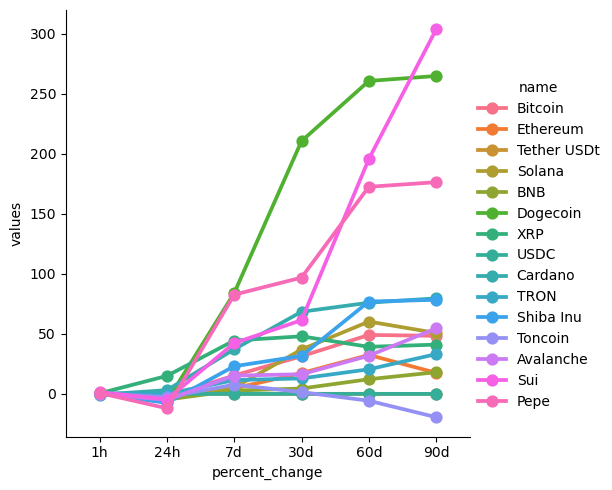

In [100]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')

In [102]:
df8 = df[['name', 'quote.USD.price', 'timestamp']]
df8

,name,quote.USD.price,timestamp
0,Bitcoin,87912.36568,2024-11-15 14:48:39.879841
1,Ethereum,3056.40563,2024-11-15 14:48:39.879841
2,Tether USDt,1.00052,2024-11-15 14:48:39.879841
3,Solana,210.13554,2024-11-15 14:48:39.879841
4,BNB,617.44131,2024-11-15 14:48:39.879841
5,Dogecoin,0.36919,2024-11-15 14:48:39.879841
6,XRP,0.79658,2024-11-15 14:48:39.879841
7,USDC,1.00008,2024-11-15 14:48:39.879841
8,Cardano,0.59238,2024-11-15 14:48:39.879841
9,TRON,0.17951,2024-11-15 14:48:39.879841


In [116]:
df8 = df[['name', 'quote.USD.price', 'timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,87912.36568,2024-11-15 14:48:39.879841


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

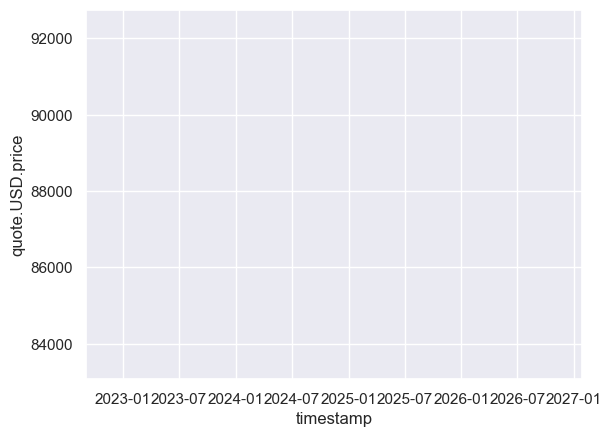

In [118]:
sns.set_theme(style = "darkgrid")
sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df8)	